# This notebook is a toxic comment classifier

Here are some links that we may use in the future

[Toxic Comment Project Repo](https://github.com/Prakhar-FF13/Toxic-Comments-Classification)

[Toxic Comment Kaggle Competition Page](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification)

In [13]:
import pandas as pd
import seaborn as sns

In [14]:
train_data = pd.read_csv("../data/train.csv.zip", index_col="id", compression="zip")

In [15]:
train_data.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


<AxesSubplot:xlabel='target', ylabel='Density'>

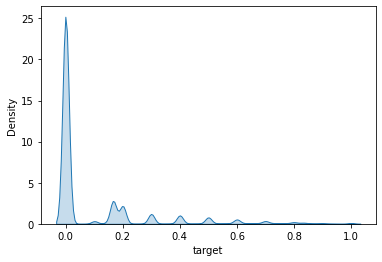

In [16]:
sns.kdeplot(data=train_data['target'], shade=True)

In [17]:
# Clamping toxicity levels to 1 and 0
train_data.loc[train_data["target"] >= 0.5, "target"] = 1
train_data.loc[train_data["target"] < 0.5, "target"] = 0

In [18]:
train_data.head()

,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
id,,,,,,,,,,,,,,,,,,,,,
59848,0.0,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59849,0.0,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59852,0.0,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59855,0.0,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
59856,1.0,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [19]:
train_data.describe()

,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,7.996902e-02,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.712453e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


<AxesSubplot:xlabel='target', ylabel='Count'>

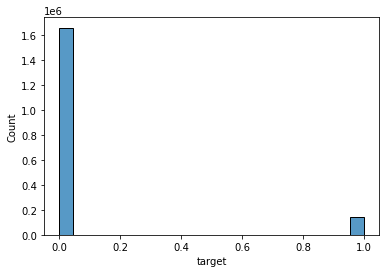

In [20]:
sns.histplot(data=train_data, x="target")

<AxesSubplot:xlabel='comment_text', ylabel='Count'>

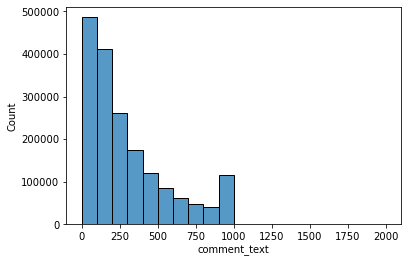

In [21]:
# Show a graph of text length
sns.histplot(data=train_data, x=train_data.comment_text.str.len(), binwidth=100)

In [22]:
# Remove Punctuation and Numbers
import string
train_data.comment_text = train_data.comment_text.str.translate(str.maketrans('', '', string.punctuation + "1234567890"))
print(train_data.comment_text[:5])

id
59848    This is so cool Its like would you want your m...
59849    Thank you This would make my life a lot less a...
59852    This is such an urgent design problem kudos to...
59855    Is this something Ill be able to install on my...
59856                  haha you guys are a bunch of losers
Name: comment_text, dtype: object


In [23]:
# Lowercase all text
train_data.comment_text = train_data.comment_text.str.lower()
print(train_data.comment_text[:5])

id
59848    this is so cool its like would you want your m...
59849    thank you this would make my life a lot less a...
59852    this is such an urgent design problem kudos to...
59855    is this something ill be able to install on my...
59856                  haha you guys are a bunch of losers
Name: comment_text, dtype: object


In [84]:
# Stemming and Lemmatising all Text
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()

def stem_and_lem(comment):
    new_comment = []
    for word in comment.split():
        new_comment.append(stemmer.stem(lemmatiser.lemmatize(word, pos='v')))
    return " ".join(new_comment)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Willi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Willi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [85]:
from os.path import exists
if(exists("../data/stemmed_data.csv")):
    train_data = pd.read_csv("../data/stemmed_data.csv")
else:
    # Will take ~30 minutes
    train_data.comment_text = train_data.comment_text.apply(stem_and_lem)
    train_data.to_csv("../data/stemmed_data.csv")

In [25]:
print(train_data.comment_text[:5])

id
59848    thi be so cool it like would you want your mot...
59849    thank you thi would make my life a lot less an...
59852    thi be such an urgent design problem kudo to y...
59855    be thi someth ill be abl to instal on my site ...
59856                     haha you guy be a bunch of loser
Name: comment_text, dtype: object


In [26]:
# Importing stop words from NLTK database
nltk.download('stopwords')

from nltk.corpus import stopwords

eng_stops = stopwords.words('english')

print(eng_stops[:10])
print("The number of stop words: ", len(eng_stops))

# TODO: Apply text transformations to stop words



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Willi\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
The number of stop words:  179


[nltk_data]   Unzipping corpora\stopwords.zip.


In [27]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words=eng_stops)
tranformed_train_data = count_vectorizer.fit_transform(train_data.comment_text)


In [28]:
# Select columns and split data
from sklearn.model_selection import train_test_split
y = train_data.target
X = tranformed_train_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)

In [45]:
print(X_train.shape)
print(y_train.shape)

(1443899, 500724)
(1443899,)


In [48]:
print(y_test[:5])

id
6204783    0.0
5739425    0.0
5028192    0.0
6319833    0.0
6077140    0.0
Name: target, dtype: float64


In [75]:
from sklearn.naive_bayes import MultinomialNB
trained_Multi_NB = MultinomialNB().fit(X_train, y_train)

In [76]:
import numpy as np
predictions = trained_Multi_NB.predict(X_test)
misclassified = np.where(y_test != predictions)
miss_df = pd.DataFrame(misclassified)

In [77]:
miss_df.transpose().shape

(30195, 1)

In [78]:
np.mean(predictions == y_test)

0.9163515478911282

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions,target_names=['Non-Toxic', 'Toxic']))

              precision    recall  f1-score   support

   Non-Toxic       0.95      0.96      0.95    332108
       Toxic       0.47      0.41      0.44     28867

    accuracy                           0.92    360975
   macro avg       0.71      0.68      0.70    360975
weighted avg       0.91      0.92      0.91    360975



In [80]:
from sklearn.linear_model import SGDClassifier
trained_SVM = SGDClassifier().fit(X_train, y_train)

In [81]:
import numpy as np
predictions = trained_SVM.predict(X_test)
misclassified = np.where(y_test != predictions)
miss_df = pd.DataFrame(misclassified)

In [82]:
np.mean(predictions == y_test)

0.9388240182838147

In [83]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions,target_names=['Non-Toxic', 'Toxic']))

              precision    recall  f1-score   support

   Non-Toxic       0.94      0.99      0.97    332108
       Toxic       0.79      0.32      0.46     28867

    accuracy                           0.94    360975
   macro avg       0.87      0.66      0.71    360975
weighted avg       0.93      0.94      0.93    360975

